In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/agent_based_sim")
from multi_agent_sim import MultiAgentSim

In [2]:
sim = MultiAgentSim(n_agents=1000, init_infection_p = 0.005)

In [3]:
sim.get_infected_agents()

[114, 186, 243, 511, 688, 794, 799, 856, 862, 925, 983]

In [4]:
sim.step(0)

In [17]:
sim.get_infected_agents()

[114, 186, 243, 442, 478, 511, 688, 794, 799, 856, 862, 925, 944, 983]

In [16]:
sim.step(6)

In [24]:
def run_trajectories(infectivity_alpha, nreps=5, max_infections=200):
    nreps = 5
    T = 12 * 7
    max_infections = 200
    infection_counts = {}
    for rep in range(nreps):
        sim = MultiAgentSim(n_agents=1000, init_infection_p = 0.005, infectivity_alpha = infectivity_alpha)
        infection_counts[rep] = [len(sim.get_infected_agents())]
        for t in range(T):
            sim.step(t)
            infection_counts[rep].append(len(sim.get_infected_agents()))
            if infection_counts[rep][-1] >= max_infections:
                break
        print("done rep # {}".format(rep))
    return infection_counts

In [25]:
alphas_to_try = [0.5, 0.75, 0.1, 1.25]
results = {}
for alpha in alphas_to_try:
    results[alpha] = run_trajectories(alpha)
    print("done alpha {}".format(alpha))

done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.5
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.75
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 0.1
done rep # 0
done rep # 1
done rep # 2
done rep # 3
done rep # 4
done alpha 1.25


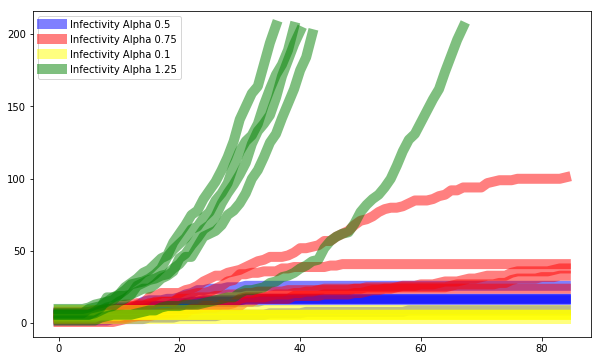

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

colours = ['blue', 'red', 'yellow', 'green']
colour_idx = 0
plt.figure(figsize=(10,6))
for alpha in alphas_to_try:
    include_legend = True
    colour = colours[colour_idx]
    for trajectory in results[alpha].values():
        xs = list(range(len(trajectory)))
        if include_legend:
            plt.plot(xs, trajectory, alpha=0.5, linewidth=10, label="Infectivity Alpha {}".format(alpha), color=colour)
            include_legend = False
        else:
            plt.plot(xs, trajectory, alpha=0.5, linewidth=10, color=colour)
    
    colour_idx += 1
plt.legend(loc='best')
plt.show()